In [126]:
df_hitter_perf = pd.read_csv('./data/hitter_perf.csv', index_col=0)
df_hitter_etc = pd.read_csv('./data/hitter_etc.csv', index_col=0)

In [127]:
dfX_hitter_perf = df_hitter_perf[['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR%_A', 'BB%_A', 'K%_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR%_B', 'BB%_B', 'K%_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']]
dfX_hitter_perf.columns=['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR_A', 'BB_A', 'K_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR_B', 'BB_B', 'K_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']
dfX_hitter_etc = df_hitter_etc[['Spectators','Broadcasting', 'GDP','Clubs','FA_Pitcher','FA_Hitter', 'Age', 'Captain', 'NationalMember', 'Marriage', 'Surgery', 'Transfer', 'GoldenGlove', 'Rookie', 'AllStar']]
dfX_hitter = pd.concat([dfX_hitter_perf, dfX_hitter_etc],axis=1)

In [128]:
dfX_hitter_perf = df_hitter_perf[['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR%_A', 'BB%_A', 'K%_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR%_B', 'BB%_B', 'K%_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']]
dfX_hitter_perf.columns=['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR_A', 'BB_A', 'K_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR_B', 'BB_B', 'K_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']
dfX_hitter_etc = df_hitter_etc[['Spectators','Broadcasting', 'GDP','Clubs','FA_Pitcher','FA_Hitter', 'Age', 'Captain', 'NationalMember', 'Marriage', 'Surgery', 'Transfer', 'GoldenGlove', 'Rookie', 'AllStar']]
dfy_hitter = df_hitter_etc['Period']

In [129]:
idx = dfy_hitter == '-'
df_hitter = pd.concat([dfX_hitter_perf, dfX_hitter_etc, dfy_hitter], axis=1)
df_hitter = df_hitter.drop(df_hitter.index[idx])
df_hitter.index = np.arange(1,len(df_hitter)+1)

In [130]:
idx = dfy_hitter == '6'
df_hitter['Period'][idx] = '4'

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [131]:
import StringIO
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

def draw_decision_tree(classifier):
   dot_buf = StringIO.StringIO()
   export_graphviz(classifier, out_file=dot_buf, feature_names=df_hitter.ix[:,:-1].columns)
   graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
   image = graph.create_png()
   return Image(image)

In [132]:
X =df_hitter.ix[:,:-1].values
y =df_hitter.ix[:,-1].values

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [149]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train, y_train)

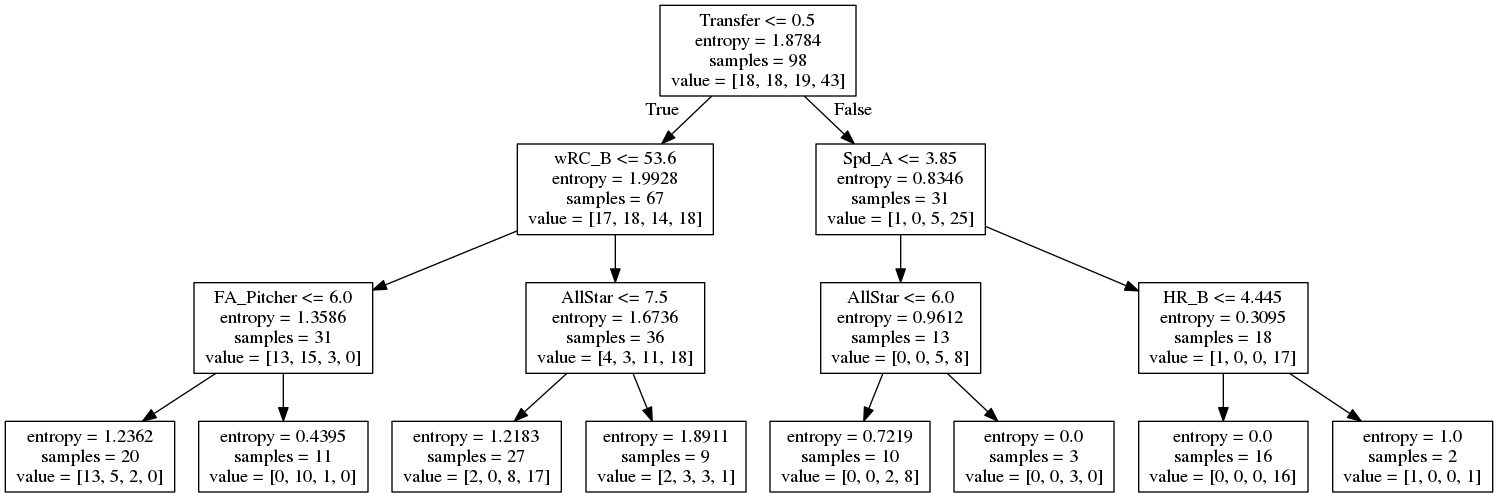

In [150]:
command_buf = StringIO.StringIO() 
export_graphviz(model, out_file=command_buf, feature_names=df_hitter.ix[:,:-1].columns) 
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0] 
image = graph.create_png()
Image(image)

In [151]:
confusion_matrix(y_train, model.predict(X_train))

array([[14,  2,  0,  2],
       [ 5, 13,  0,  0],
       [ 2,  4,  3, 10],
       [ 1,  1,  0, 41]])

In [152]:
confusion_matrix(y_test, model.predict(X_test))

array([[2, 0, 0, 3],
       [2, 6, 0, 0],
       [1, 0, 0, 0],
       [2, 2, 0, 7]])

In [153]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          1       0.64      0.78      0.70        18
          2       0.65      0.72      0.68        18
          3       1.00      0.16      0.27        19
          4       0.77      0.95      0.85        43

avg / total       0.77      0.72      0.68        98



In [154]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          1       0.29      0.40      0.33         5
          2       0.75      0.75      0.75         8
          3       0.00      0.00      0.00         1
          4       0.70      0.64      0.67        11

avg / total       0.61      0.60      0.60        25



In [156]:
from sklearn.metrics import classification_report

print(classification_report(y, model.predict(X)))

             precision    recall  f1-score   support

          1       0.55      0.70      0.62        23
          2       0.68      0.73      0.70        26
          3       1.00      0.15      0.26        20
          4       0.76      0.89      0.82        54

avg / total       0.74      0.70      0.67       123

